## Agglomerative Clustering 

* Terminology 
* Introduction to Agglomerative Clustering
* Loading and Preparing Data
* Performing Agglomerative Clustering
* Creating and Interpreting Dendrograms
* Selecting the Number of Clusters

### Terminology

* **Hierarchical clustering** is a method of cluster analysis which seeks to build a hierarchy of clusters. This method starts by treating each data point as its own individual cluster and then iteratively merges the closest pairs of clusters until only one single cluster remains, thus forming a tree-like structure known as a dendrogram. The height of each merge in the dendrogram indicates the distance or dissimilarity between the clusters being merged. This visualization helps to understand the data's structure and determine the optimal number of clusters by identifying significant gaps in the hierarchy. Hierarchical clustering can be divided into **agglomerative** (bottom-up approach) and **divisive** (top-down approach) methods.
* **Agglomerative clustering** is a type of hierarchical clustering method that builds clusters by progressively merging the closest pairs of data points or clusters. Starting with each data point as a single cluster, the algorithm iteratively combines the two clusters with the smallest distance between them, based on a specified linkage criterion (e.g., single linkage, complete linkage, or average linkage). This process continues until all data points are merged into a single cluster. The result is a dendrogram, a tree-like diagram that visually represents the merging process, showing the distances at which clusters were merged. Agglomerative clustering is particularly useful for identifying the natural groupings within data and is often employed in exploratory data analysis to determine the optimal number of clusters.

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import matplotlib.pyplot as plt

# Set up notebook display options
%matplotlib inline

### Introduction to Agglomerative Clustering

Agglomerative clustering is a type of hierarchical clustering that begins with each data point as its own cluster and iteratively merges the closest clusters until only one cluster remains. This creates a hierarchy of clusters, which can be visualized using a dendrogram.



### Loading and Preparing Data

/var/folders/6d/xqywj2xx2llc_k2t6nkshrgh0000gn/T/ipykernel_76215/1978623735.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


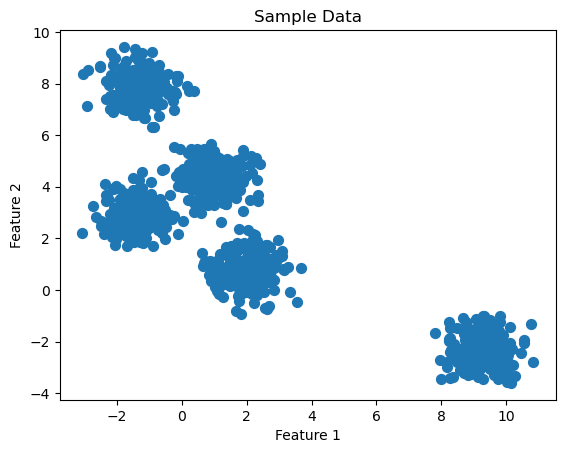

In [23]:
# Create a sample dataset
X, y = make_blobs(n_samples=1000, centers=5, cluster_std=0.60, random_state=0)

# Plot the sample data
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title('Sample Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()



### Performing Agglomerative Clustering

In [26]:
# Perform hierarchical/agglomerative clustering
Z = linkage(X, 'ward')

In agglomerative clustering, the **linkage** function is a crucial component that determines how the distance between clusters is calculated and consequently how clusters are merged at each step of the algorithm. The linkage function takes a distance matrix or raw data and computes the hierarchical clustering. It employs different linkage criteria to decide the distance between clusters, influencing the structure of the resulting dendrogram.

The primary linkage criteria include:
* **Single Linkage** (Minimum Linkage): The distance between two clusters is defined as the minimum distance between any single point in the first cluster and any single point in the second cluster.
* **Complete Linkage** (Maximum Linkage): The distance between two clusters is defined as the maximum distance between any single point in the first cluster and any single point in the second cluster.
* **Average Linkage**: The distance between two clusters is defined as the average distance between all pairs of points where each pair consists of one point from each cluster.
* **Centroid Linkage**: The distance between two clusters is defined as the distance between the centroids (mean points) of the clusters.

**The "ward" Parameter**

The **ward** parameter refers to Ward's linkage method, which is a specific criterion used within the linkage function. Ward's method minimizes the total within-cluster variance. At each step, it merges the pair of clusters that leads to the minimum increase in total within-cluster variance after merging.

This method involves the following steps:
* Calculate Centroids: For each cluster, calculate the centroid (mean of all points in the cluster).
* Merge Clusters: Identify the pair of clusters whose merger results in the smallest increase in the within-cluster variance. Merge these two clusters.
* Repeat: Continue this process until all data points are merged into a single cluster.

Ward's method tends to create clusters of relatively equal size and is particularly effective for spherical-shaped clusters. This makes it a popular choice for hierarchical clustering in many applications.



### Creating and Interpreting Dendrograms

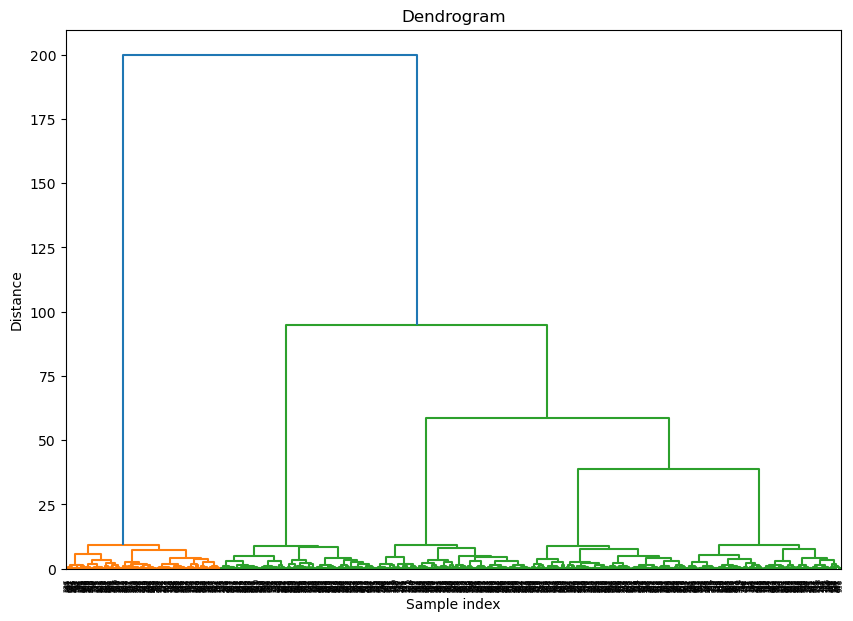

In [30]:
# Create a dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(Z)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In a dendrogram, each merge is represented by a U-shaped line. The height of the U indicates the distance (or dissimilarity) between the clusters being merged. By looking at the dendrogram, we can identify the most natural number of clusters by finding the largest vertical distance that doesn't cross any horizontal line.

### Selecting the Number of Clusters

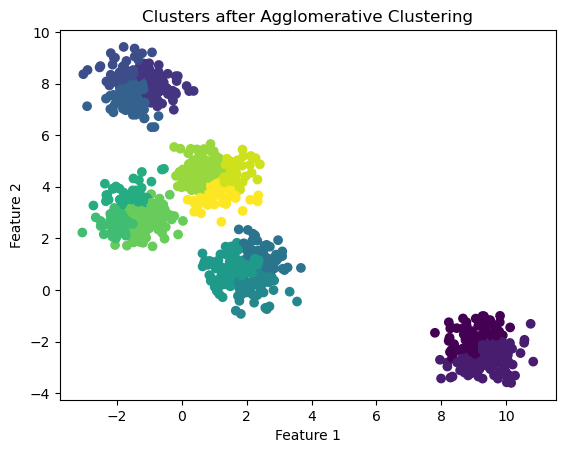

In [32]:
# Cut the dendrogram to form flat clusters
max_d = 7.5  # This threshold distance will determine the number of clusters
clusters = fcluster(Z, max_d, criterion='distance')

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters after Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**Explanation on selecting the number of clusters**

To select the most meaningful number of clusters, we can look for a threshold distance where the dendrogram forms distinct horizontal cuts. In this case, we set a threshold of 7.5, which resulted in three clusters. This threshold should be chosen by analyzing the dendrogram and identifying where large vertical distances occur between merges.

